<a href="https://colab.research.google.com/github/gokulstarkAI/sentiment_analysis_NLP_Music_reviews/blob/main/music_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective
* Create own dataset that contains a random sample of reviews

In [3]:
!pip install ndjson

In [4]:
import ndjson
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
# reading review from json file
with open('/content/drive/MyDrive/nlp_music_reviews/reviews_Digital_Music_5.json') as f:
  data = ndjson.load(f)

In [6]:
reviews_df = pd.DataFrame(data)

In [7]:
reviews_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A3EBHHCZO6V2A4,5555991584,"Amaranth ""music fan""","[3, 3]","It's hard to believe ""Memory of Trees"" came ou...",5.0,Enya's last great album,1158019200,"09 12, 2006"
1,AZPWAXJG9OJXV,5555991584,bethtexas,"[0, 0]","A clasically-styled and introverted album, Mem...",5.0,Enya at her most elegant,991526400,"06 3, 2001"
2,A38IRL0X2T4DPF,5555991584,bob turnley,"[2, 2]",I never thought Enya would reach the sublime h...,5.0,The best so far,1058140800,"07 14, 2003"
3,A22IK3I6U76GX0,5555991584,Calle,"[1, 1]",This is the third review of an irish album I w...,5.0,Ireland produces good music.,957312000,"05 3, 2000"
4,A1AISPOIIHTHXX,5555991584,"Cloud ""...""","[1, 1]","Enya, despite being a successful recording art...",4.0,4.5; music to dream to,1200528000,"01 17, 2008"


Data Dictionry
* reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
* asin - ID of the product, e.g. 0000013714
* reviewerName - name of the reviewer
* reviewText - text of the review
* summary - summary of the review
* unixReviewTime - time of the review (unix time)
* reviewTime - time of the review (raw)

In [10]:
reviews_df.shape

(64706, 9)

In [11]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64706 entries, 0 to 64705
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      64706 non-null  object 
 1   asin            64706 non-null  object 
 2   reviewerName    64529 non-null  object 
 3   helpful         64706 non-null  object 
 4   reviewText      64706 non-null  object 
 5   overall         64706 non-null  float64
 6   summary         64706 non-null  object 
 7   unixReviewTime  64706 non-null  int64  
 8   reviewTime      64706 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 4.4+ MB


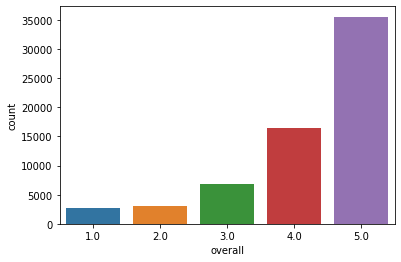

In [12]:
sns.countplot(data=reviews_df, x='overall')

In [13]:
len(reviews_df['asin'].value_counts(dropna='False'))

3568

## Undersampling of Reviews
Taking a random sample of the reviews by selecting 1500 reviews with rating 1, 500-500-500 reviews with ratings 2, 3, 4, and 1500 reviews with rating 5. This way you get a smaller balanced corpus

In [14]:
one_1500 = reviews_df[reviews_df['overall']==1.0].sample(n=1500)
two_500 = reviews_df[reviews_df['overall']==2.0].sample(n=500)
three_500 = reviews_df[reviews_df['overall']==3.0].sample(n=500)
four_500 = reviews_df[reviews_df['overall']==4.0].sample(n=500)
five_1500 = reviews_df[reviews_df['overall']==5.0].sample(n=1500)

In [15]:
undersampled_reviews = pd.concat([one_1500, two_500, three_500, four_500, five_1500], axis=0)

In [16]:
undersampled_reviews['overall'].value_counts(dropna=False)

1.0    1500
5.0    1500
2.0     500
3.0     500
4.0     500
Name: overall, dtype: int64

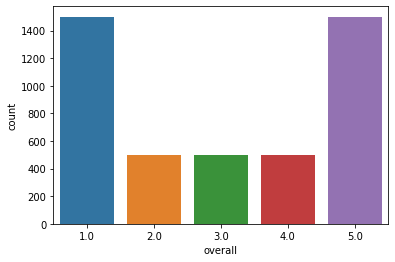

In [17]:
sns.countplot(data=undersampled_reviews, x='overall')

## Random Sampling of 30K Reviews

In [21]:
sample_30k_revs = reviews_df.sample(n=30000, random_state=42)

## Writing Corpora

In [20]:
undersampled_reviews.to_csv('/content/drive/MyDrive/nlp_music_reviews/small_corpus.csv', index=False)

In [22]:
sample_30k_revs.to_csv('/content/drive/MyDrive/nlp_music_reviews/big_corpus.csv', index=False)